In [1]:
import sys
import random
sys.path.append("../")
from Core.maze import Maze
from functools import reduce

# True Prim's Algorithm

## How does it work?
Prim's Algorithm works similarly to Djikstra's algorithm, starting at one point in the grid and moving outward like water flowing, but in this case it constructs a spanning tree across the grid, thus generating a maze. As opposed to the Simple Prim's Algorithm which treats every node indifferently, True Prim's Algorithm assigns weights to cells and then greedily adds paths between these cells to produce the maze.

## Is every node connected?
Yes, every node is connected. This is due to the fact that the algorithm starts at an arbitrary node and does not terminate until all the nodes have been added to the maze.

In [2]:
def TruePrims(maze):
    # populate the matrix with random weights for each nodde
    weights = [
        [random.randint(0, 100) for i in range(maze.num_columns)] 
        for j in range(maze.num_rows)
    ]
    
    unvisited = set([
        (x, y) for x in range(maze.num_columns) for y in range(maze.num_rows)
    ])
    
    # randomly pick a node to start from
    initial = (
        random.randint(0, maze.num_rows - 1), 
        random.randint(0, maze.num_columns - 1)
    )

    current = initial
    reachable = set()
    while True:
        unvisited.remove((current[0], current[1]))
        
        # compute reachable neighbors from current node
        if current[0] > 0 and (current[0] - 1, current[1]) in unvisited:
            reachable.add((current[0] - 1, current[1]))
        if current[0] < maze.num_columns - 1 and (current[0] + 1, current[1]) in unvisited:
            reachable.add((current[0] + 1, current[1]))
        if current[1] > 0 and (current[0], current[1] - 1) in unvisited:
            reachable.add((current[0], current[1] - 1))
        if current[1] < maze.num_rows - 1 and (current[0], current[1] + 1) in unvisited:
            reachable.add((current[0], current[1] + 1))
        
        # pick the next reachable node having least weight
        adjacent = reduce(
            lambda a, b: a if weights[a[0]][a[1]] < weights[b[0]][b[1]] else b, 
            list(reachable)
        )
        
        # determine direction of path to be added
        directions = []
        if adjacent[0] > 0 and (adjacent[0] - 1, adjacent[1]) not in unvisited:
            directions.append("W")
        if adjacent[0] < maze.num_columns - 1 and (adjacent[0] + 1, adjacent[1]) not in unvisited:
            directions.append("E")
        if adjacent[1] > 0 and (adjacent[0], adjacent[1] - 1) not in unvisited:
            directions.append("N")
        if adjacent[1] < maze.num_rows - 1 and (adjacent[0], adjacent[1] + 1) not in unvisited:
            directions.append("S")
        
        path = random.choice(directions)
        
        maze.add_path((adjacent[0], adjacent[1]), path, 0)
        reachable.remove(adjacent)
        current = adjacent
        
        # terminate when no more reachable nodes are left
        if not reachable:
            return initial

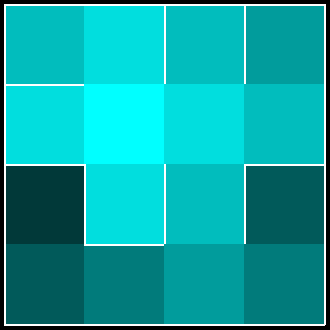

In [3]:
maze = Maze(4, 4)
initial = TruePrims(maze)
maze.add_colors(start=initial, color=(0, 255, 255))
display(maze.draw(cell_width=80))

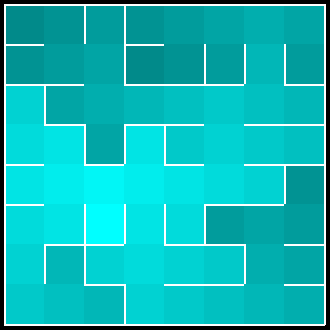

In [4]:
maze = Maze(8, 8)
initial = TruePrims(maze)
maze.add_colors(start=initial, color=(0, 255, 255))
display(maze.draw(cell_width=40))

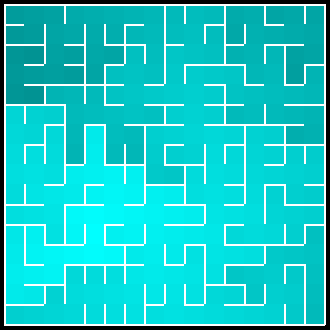

In [5]:
maze = Maze(16, 16)
initial = TruePrims(maze)
maze.add_colors(start=initial, color=(0, 255, 255))
display(maze.draw(cell_width=20))

## Basic Analysis
### Time Complexity: O(N<sup>2</sup>)
The time complexity of Prim's Algorithm depends on the data structure used as input. We use a grid/adjacency matrix representation as input and traverse all the nodes once, and in this particular implementation, a new grid having the same dimensions but with randomized weights for each node has to be constructed. So the time complexity turns out to be O(2N<sup>2</sup>) = O(N<sup>2</sup>), where N is the number of cells/nodes in the grid.

### Space Complexity: O(N)
We're required to keep track of visited/unvisited nodes in the grid to avoid cycles in the spanning tree constructed by our algorithm, and in this particular implementation, another grid that contains weights for each node randomly generated by the algorithm before traversal. Hence, the space complexity would be O(2N) = O(N), where N is the number of cells/nodes in the grid.

### Bias/Texture:
Maps generated using True Prim's Algorithm have a noticeably different texture than those generated using Simple Prim's Algorithm, but similar to those generated using a Randomized Kruskal's Algorithm. This is due to the fact that since each node possesses a different weight, the spanning tree does not grow out radially from the initial node as it would on an equally weighted grid but would be biased towards nodes with lower weights.